In [226]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [227]:
df_train = pd.read_csv("C:/Users/FPTSHOP/OneDrive/Documents/SAV/RawData/mobileData/Train.csv", index_col= 0)
df_valid = pd.read_csv("C:/Users/FPTSHOP/OneDrive/Documents/SAV/RawData/mobileData/Dev.csv", index_col= 0)
df_test = pd.read_csv("C:/Users/FPTSHOP/OneDrive/Documents/SAV/RawData/mobileData/Test.csv", index_col= 0)



In [228]:
df_train.head()

,comment,n_star,date_time,label
index,,,,
0,Mới mua máy này Tại thegioididong thốt nốt cảm...,5,2 tuần trước,{CAMERA#Positive};{FEATURES#Positive};{BATTERY...
1,Pin kém còn lại miễn chê mua 8/3/2019 tình trạ...,5,14/09/2019,{BATTERY#Negative};{GENERAL#Positive};{OTHERS};
2,Sao lúc gọi điện thoại màn hình bị chấm nhỏ nh...,3,17/08/2020,{FEATURES#Negative};
3,"Mọi người cập nhật phần mềm lại , nó sẽ bớt tố...",3,29/02/2020,{FEATURES#Negative};{BATTERY#Neutral};{GENERAL...
4,"Mới mua Sài được 1 tháng thấy pin rất trâu, Sà...",5,4/6/2020,{BATTERY#Positive};{PERFORMANCE#Positive};{SER...


In [229]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7786 entries, 0 to 7785
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   comment    7786 non-null   object
 1   n_star     7786 non-null   int64 
 2   date_time  7786 non-null   object
 3   label      7786 non-null   object
dtypes: int64(1), object(3)
memory usage: 304.1+ KB


## **Lables**

In [230]:
# Regular expression pattern to match aspect names and labels
pattern = r'{([^#]*)#([^}]*)'

# Initialize dictionary to store counts
aspect_label_counts = {}

# Extract aspect names and labels
for sentence in df_train.label:
    matches = re.findall(pattern, sentence)
    for aspect, label in matches:
        if aspect not in aspect_label_counts:
            aspect_label_counts[aspect] = {'Positive': 0, 'Negative': 0,'Neutral': 0}
        aspect_label_counts[aspect][label] += 1

# Convert to DataFrame
df_check_label = pd.DataFrame(aspect_label_counts).T.reset_index()
df_check_label.columns = ['Aspect', 'Positive', 'Negative','Neutral']

In [231]:
df_check_label

,Aspect,Positive,Negative,Neutral
0,CAMERA,1231,627,288
1,FEATURES,785,1659,198
2,BATTERY,2027,1228,349
3,PRICE,609,316,1136
4,GENERAL,3627,949,290
5,SER&ACC,1401,487,107
6,PERFORMANCE,2253,1496,391
7,SCREEN,514,379,56
8,DESIGN,999,302,77
9,STORAGE,59,21,11


In [232]:
totals = df_check_label[['Positive', 'Negative', 'Neutral']].sum()

totals_row = pd.DataFrame([['Total', *totals]], columns=df_check_label.columns)

df_check_label = pd.concat([df_check_label, totals_row], ignore_index=True)

print(df_check_label)

         Aspect  Positive  Negative  Neutral
0        CAMERA      1231       627      288
1      FEATURES       785      1659      198
2       BATTERY      2027      1228      349
3         PRICE       609       316     1136
4       GENERAL      3627       949      290
5       SER&ACC      1401       487      107
6   PERFORMANCE      2253      1496      391
7        SCREEN       514       379       56
8        DESIGN       999       302       77
9       STORAGE        59        21       11
10        Total     13505      7464     2903


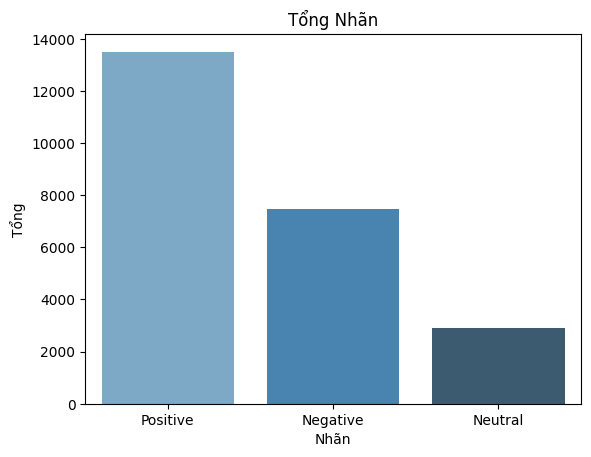

In [233]:
totals = df_check_label.iloc[-1, 1:]

sns.barplot(x=totals.index, y=totals.values, palette='Blues_d')

plt.title('Tổng Nhãn')
plt.xlabel('Nhãn')
plt.ylabel('Tổng')

plt.show()


In [234]:
df_check_label['Row_Total'] = df_check_label[['Positive', 'Negative', 'Neutral']].sum(axis=1)
df_check_label


,Aspect,Positive,Negative,Neutral,Row_Total
0,CAMERA,1231,627,288,2146
1,FEATURES,785,1659,198,2642
2,BATTERY,2027,1228,349,3604
3,PRICE,609,316,1136,2061
4,GENERAL,3627,949,290,4866
5,SER&ACC,1401,487,107,1995
6,PERFORMANCE,2253,1496,391,4140
7,SCREEN,514,379,56,949
8,DESIGN,999,302,77,1378
9,STORAGE,59,21,11,91


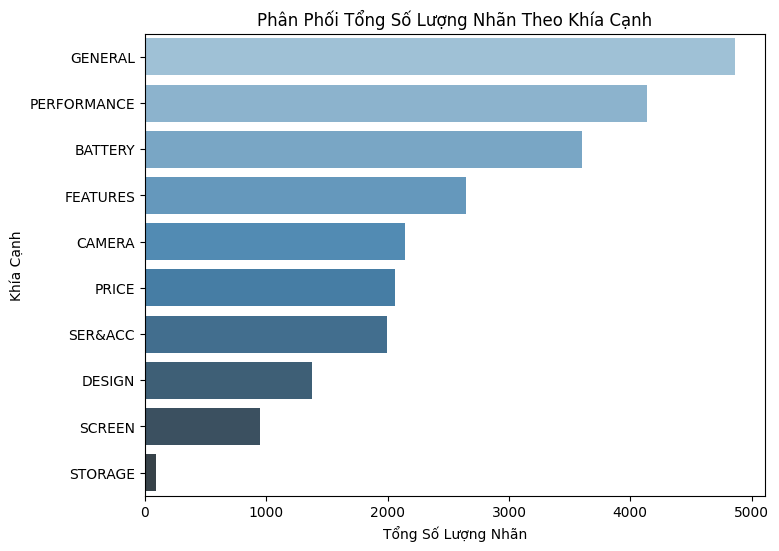

In [235]:
df_plot = df_check_label[:-1]

df_plot_sorted = df_plot.sort_values('Row_Total', ascending=False)

plt.figure(figsize=(8, 6))  
sns.barplot(x='Row_Total', y='Aspect', data=df_plot_sorted, palette='Blues_d')

plt.title('Phân Phối Tổng Số Lượng Nhãn Theo Khía Cạnh')
plt.xlabel('Tổng Số Lượng Nhãn')
plt.ylabel('Khía Cạnh')

plt.show()


In [236]:
df_train.head()

,comment,n_star,date_time,label
index,,,,
0,Mới mua máy này Tại thegioididong thốt nốt cảm...,5,2 tuần trước,{CAMERA#Positive};{FEATURES#Positive};{BATTERY...
1,Pin kém còn lại miễn chê mua 8/3/2019 tình trạ...,5,14/09/2019,{BATTERY#Negative};{GENERAL#Positive};{OTHERS};
2,Sao lúc gọi điện thoại màn hình bị chấm nhỏ nh...,3,17/08/2020,{FEATURES#Negative};
3,"Mọi người cập nhật phần mềm lại , nó sẽ bớt tố...",3,29/02/2020,{FEATURES#Negative};{BATTERY#Neutral};{GENERAL...
4,"Mới mua Sài được 1 tháng thấy pin rất trâu, Sà...",5,4/6/2020,{BATTERY#Positive};{PERFORMANCE#Positive};{SER...
